In [24]:
from vlab._utils import load_yaml_file
import matplotlib.pyplot as plt
plt.rcParams['text.usetex'] = True
plt.rcParams['font.size'] = 14

config = load_yaml_file('config.yaml')
config

{'commit': 'eb781b50cef7edcb68b5020ea2ab2dab2d2122fd', 'experiment_tag': 'sweep_n_tr', 'n_tr': 5000, 'n_trs': 'np.logspace(2.302,3.699,20).astype(int)', 'hidden_layer_sizes': '(200,)', 'alpha': 1.25, 'gamma': '2/3', 'tau': 0.2, 'taus': 'np.linspace(0.05,0.80, 16)', 'n_te': 1000, 'max_iter': 2000, 'replicate': 1, 'method': 'rreg', 'sweep': 'tau', 'run_protocol': ['plot_figure.ipynb'], 'results': ['76c7f9f44cca256b649ac4a45011d42816cea1f1', 'ff2a2069ae87650e3fbd3a0531c21d64e01fc31e'], 'archive_path': '/home/yutongw/projects/Near-interpolators/paper_figures/archive'}

In [25]:
import pandas as pd
import os

In [26]:
res_hash = config['results'][0]
# get_df_from_res_hash(res_hash)
[filename for filename in os.listdir(f"{config['archive_path']}/{res_hash}/outputs") if filename.split(".")[1]=='csv']


['results3.csv',
 'results1.csv',
 'results2.csv',
 'results4.csv',
 'results5.csv']

In [27]:

# for res_hash in config['results']:
def get_df_from_res_hash(res_hash):
    print(res_hash)
    csv_files = [filename for filename in os.listdir(f"{config['archive_path']}/{res_hash}/outputs") if filename.split(".")[1]=='csv']
    df = pd.concat([pd.read_csv(f"{config['archive_path']}/{res_hash}/outputs/{csv_file}") for csv_file in csv_files])
    # dfs.append(pd.read_csv(f"{config['archive_path']}/{res_hash}"))
    return df
import vlab
def get_config_from_res_hash(res_hash):
    print(res_hash)
    return vlab.utils.load_yaml_file(f"{config['archive_path']}/{res_hash}/config.yaml")


In [28]:
from test_error_analytic_form import get_risk_predictors, k_grid, get_E_tr_inv

from binary_search import binary_search
colors = ['#1E88E5', '#D81B60']
colorsL= ['#A5D5FF','#FF86B2']
import numpy as np
def plot_trade_off_curve(gamma, alpha, **kwargs):
    E_te, E_tr, R = get_risk_predictors(gamma, alpha)
    k_crit = binary_search(R,0,n_steps=30, init=1.5, LB=1.0, UB= 2.0)
    ks = np.logspace(np.log10(k_crit), 4, num=100)
    E_tr_inv = get_E_tr_inv(gamma,alpha)
    ks = np.array([E_tr_inv(tau) for tau in np.linspace(0.001,0.98,100)])
    # plt.scatter(df["rreg_E_tr"], df["rreg_E_te"],color = '#1f77b4',label='near-interpol-RR')
    
    
    plt.plot(E_tr(ks),E_te(ks),**kwargs)
    # ks = np.array([E_tr_inv(tau) for tau in np.linspace(0.001,0.98,20)])
    # plt.scatter(E_tr(ks),E_te(ks))

import numpy as np
from scipy.stats import linregress

def regression_line(df,quantity_name,legend=False,**kwargs):
    n_trs = df['n_tr']
    # Get log values
    log_n_tr = np.log(n_trs)
    log_mlp_norm = np.log(df[quantity_name])

    # Linear regression
    slope, intercept, _, _, _ = linregress(log_n_tr, log_mlp_norm)

    # Linear fit line
    x_values = np.linspace(min(n_trs),max(n_trs))

    if legend:
        
        plt.plot(x_values, np.exp(intercept)*x_values**slope,label= r'LSq fit (log-log)', **kwargs)
    else:
        plt.plot(x_values, np.exp(intercept)*x_values**slope,**kwargs)
    return slope, intercept


76c7f9f44cca256b649ac4a45011d42816cea1f1
76c7f9f44cca256b649ac4a45011d42816cea1f1
ff2a2069ae87650e3fbd3a0531c21d64e01fc31e
ff2a2069ae87650e3fbd3a0531c21d64e01fc31e


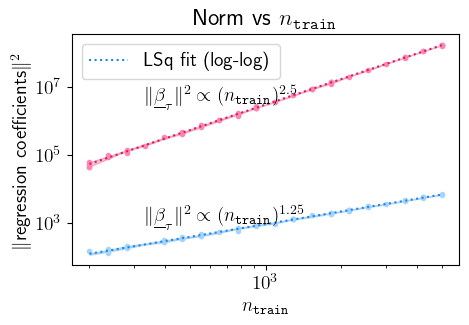

In [30]:
plt.figure(figsize=(5,3))

for i in range(len(config['results'])):
    res_hash = config['results'][i]
    df = get_df_from_res_hash(res_hash)
    
    run_config = get_config_from_res_hash(res_hash)
    medians = df.groupby('n_tr')[['n_tr', 'norm']].median()
    quantiles_20 = df.groupby('n_tr')[['n_tr', 'norm']].quantile(0.20)
    quantiles_80 = df.groupby('n_tr')[['n_tr', 'norm']].quantile(0.80)

    # plt.plot(medians['n_tr'], medians['norm'], color =colors[i])

    
    if i == 0:
        a,b = regression_line(df,'norm',color = colors[i], linestyle=":",legend=True)
    else:
        a,b = regression_line(df,'norm',color = colors[i], linestyle=":")
    a = np.round(a,2)
    b = np.round(np.exp(b),2)
    x,y = (df['n_tr'].median(), df['norm'].median())
    plt.gca().annotate(r'$\|\underline{\beta}_{\tau}\|^2 \propto(n_{\mathtt{train}})^{'+str(a)+'}$', (x,y), xytext=(x/3, y*1.25))
    
    # if i == 0:
    #     plt.fill_between(quantiles_20['n_tr'], quantiles_20['norm'], quantiles_80['norm'], color=colors[i], alpha=0.25, label='20-80 qtl')
    # else:
    #     plt.fill_between(quantiles_20['n_tr'], quantiles_20['norm'], quantiles_80['norm'], color=colors[i], alpha=0.25)
    plt.fill_between(quantiles_20['n_tr'], quantiles_20['norm'], quantiles_80['norm'], color=colors[i], alpha=0.25)
    df_small = df.sample(frac=0.25)
    
    # if i == 0:
    #     plt.scatter(df_small['n_tr'], df_small['norm'],color=colorsL[i], marker='.', label='experiment')
    # else:
    #     plt.scatter(df_small['n_tr'], df_small['norm'],color=colorsL[i], marker='.')
    plt.scatter(df_small['n_tr'], df_small['norm'],color=colorsL[i], marker='.')


plt.legend()
plt.title(r"Norm vs $n_{\mathtt{train}}$")
plt.xscale('log')
plt.yscale('log')
plt.xlabel(r'$n_{\mathtt{train}}$')
plt.ylabel(r'$\|$regression coefficients$\|^2$')
plt.savefig('outputs/norm_growth.png')
plt.savefig('outputs/norm_growth.svg')
